In [1]:
import turicreate as tc

In [2]:
image_train=tc.SFrame('image_train_data/')
image_test=tc.SFrame('image_test_data/')

## explore

In [3]:
image_train.show()

Materializing SFrame

Warning: Skipping column 'image'. Unable to show columns of type 'image'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [4]:
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


## raw classifier

In [5]:
raw_pixel_model=tc.logistic_classifier.create(image_train,target='label',features=['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.036544  | 1.573282     | 0.320378          | 0.336634            |

| 1         | 9        | 0.767428  | 2.121296     | 0.373424          | 0.336634            |

| 2         | 11       | 0.767428  | 2.598551     | 0.425420          | 0.376238            |

| 3         | 12       | 0.959285  | 2.883077     | 0.429097          | 0.366337            |

| 4         | 13       | 1.000000  | 3.150065     | 0.454832          | 0.455446            |

| 9         | 19       | 1.000000  | 4.547218     | 0.531513          | 0.475248            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

### prediction - raw

In [7]:
image_test[0:3]

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."


In [8]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

### evaluation

In [9]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.48,
 'auc': 0.7279768333333336,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |  111  |
 |     cat      |       cat       |  313  |
 |     bird     |    automobile   |  136  |
 |  automobile  |    automobile   |  638  |
 |     dog      |       bird      |  258  |
 |     cat      |    automobile   |  163  |
 |     dog      |       dog       |  423  |
 |     cat      |       dog       |  317  |
 |     bird     |       cat       |  146  |
 |  automobile  |       bird      |  118  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.47549004386073357,
 'log_loss': 1.1966202839806037,
 'precision'

## using features

In [10]:
len(image_train)

2005

In [11]:
##not runnable as we dont have imagenet_model
deep_learning_model=tc.load_model('imagenet_model')
image_train['deep_features']=deep_learning_model.extract_features(image_train)

OSError: Directory imagenet_model does not exist

In [12]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


## train classifier with deep features

In [13]:
deep_features_model=tc.logistic_classifier.create(image_train,target='label',features=['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.666979     | 0.746849          | 0.752475            |

| 1         | 5        | 0.500000  | 1.323083     | 0.764706          | 0.792079            |

| 2         | 8        | 0.307987  | 2.222388     | 0.781513          | 0.801980            |

| 3         | 10       | 0.307987  | 2.890267     | 0.800945          | 0.792079            |

| 4         | 11       | 0.384984  | 3.355130     | 0.837185          | 0.782178            |

| 9         | 17       | 0.999791  | 6.191917     | 0.907563          | 0.831683            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# apply

In [16]:
image_test[0:3]

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."


In [17]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

### evaluation

In [18]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.794,
 'auc': 0.9411759166666632,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   7   |
 |     dog      |       bird      |   61  |
 |     cat      |    automobile   |   14  |
 |     cat      |       dog       |  230  |
 |     dog      |       dog       |  734  |
 |     cat      |       bird      |   86  |
 |     bird     |       dog       |   46  |
 |  automobile  |       dog       |   7   |
 |     dog      |       cat       |  198  |
 |  automobile  |       cat       |   29  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7950026967141135,
 'log_loss': 0.5694432984299539,
 'precision'

In [19]:
knn_model=tc.nearest_neighbors.create(image_train,features=['deep_features']
                                     ,label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [20]:
def get_images_from_id(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.0498753   | 24.239ms     |

| Done         |         | 100         | 248.338ms    |

+--------------+---------+-------------+--------------+

,id,image,label,deep_features,image_array
0,331,,cat,"[0.0, 0.0, 0.5109639167785645, 0.0, 0.0, 0.0, 11.272439956665039, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1253304481506348, 0.0, 0.5219167470932007, 0.5971229076385498, 0.0, 0.6972668170928955, 0.0, 0.24001091718673706, 0.0, 1.0731264352798462, 0.0, 0.0, 0.10970926284790039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6569366455078125, 0.0, 0.0, 0.0, 0.0, 1.0214426517486572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2922544479370117, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8759312629699707, 0.8046186566352844, 0.0, 1.5726779699325562, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1985647678375244, 0.0, 0.0, 2.738689422607422, 0.0, 0.0, 0.0, 0.48699140548706055, 0.023147881031036377, 0.0, 0.16829437017440796, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8470346331596375, 1.0001214742660522, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[45.0, 65.0, 92.0, 72.0, 95.0, 110.0, 106.0, 132.0, 129.0, 106.0, 132.0, 129.0, 109.0, 134.0, 131.0, 111.0, 137.0, 134.0, 111.0, 139.0, 135.0, 115.0, 145.0, 142.0, 91.0, 112.0, 107.0, 85.0, 100.0, 96.0, 92.0, 113.0, 110.0, 84.0, 102.0, 99.0, 116.0, 141.0, 138.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 123.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 122.0, 148.0, 145.0, 123.0, 148.0, 144.0, 123.0, 147.0, 144.0, 123.0, 147.0, 143.0, 122.0, 150.0, 146.0, 108.0, 104.0, 113.0, 93.0, 45.0, 73.0, 72.0, 38.0, 64.0, 41.0, 23.0, 43.0, 23.0, 18.0, 24.0, 36.0, 31.0, 20.0, 52.0, 44.0, 29.0, 46.0, 67.0, 96.0, 76.0, ...]"
1,16289,,cat,"[0.964287519454956, 0.0, 0.0, 0.0, 1.1251550912857056, 0.0, 9.312150955200195, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9964497089385986, 0.20313739776611328, 0.0, 1.9780253171920776, 0.8170939683914185, 0.0, 0.0, 0.0, 0.0, 1.7009224891662598, 0.5013698935508728, 0.0, 0.0, 0.0, 1.9672785997390747, 0.0, 0.0, 0.0, 0.0, 1.1179927587509155, 0.12306243181228638, 0.0, 0.0, 0.013147711753845215, 0.0, 0.0, 1.0392909049987793, 0.9930934309959412, 0.0, 0.0, 0.22333812713623047, 0.009367823600769043, 0.0, 0.0, 0.0, 0.0, 0.13046950101852417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5344581604003906, 0.0, 0.0, 0.0, 1.211628794670105, 0.0, 0.0, 0.6291561126708984, 0.35370469093322754, 0.5080443620681763, 2.374500274658203, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6534329056739807, 0.0, 0.0, 2.430657386779785, 0.0, 0.0, 0.0, 0.11062061786651611, 0.4345150589942932, 0.0, 0.0, 0.1659744381904602, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.025784790515899658, 0.5490762591362, 0.21386826038360596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[215.0, 219.0, 231.0, 215.0, 219.0, 232.0, 216.0, 219.0, 233.0, 214.0, 217.0, 230.0, 213.0, 216.0, 230.0, 209.0, 215.0, 226.0, 208.0, 217.0, 221.0, 206.0, 215.0, 219.0, 201.0, 208.0, 217.0, 197.0, 203.0, 218.0, 194.0, 200.0, 221.0, 199.0, 204.0, 221.0, 142.0, 128.0, 131.0, 76.0, 46.0, 46.0, 81.0, 55.0, 57.0, 147.0, 136.0, 139.0, 160.0, 149.0, 154.0, 152.0, 141.0, 144.0, 156.0, 147.0, 150.0, 159.0, 148.0, 154.0, 160.0, 153.0, 157.0, 164.0, 156.0, 160.0, 160.0, 154.0, 158.0, 158.0, 151.0, 156.0, 159.0, 149.0, 157.0, 159.0, 150.0, 156.0, 157.0, 147.0, 154.0, 156.0, 145.0, 153.0, 152.0, 142.0, 149.0, 147.0, 137.0, 143.0, 141.0, 131.0, 136.0, 142.0, 131.0, 136.0, 215.0, 219.0, 231.0, 215.0, ...]"
2,25713,,cat,"[0.5369712710380554, 0.0, 0.0, 0.08944588899612427, 0.2364743947982788, 0.3688161373138428, 9.64945125579834, 0.0, 0.0, 0.0, 0.0, 0.0, 1.345590353012085, 0.7391354441642761, 0.0, 0.0, 0.4072381854057312, 0.8558321595191956, 0.0, 0.0, 0.0, 1.1061797142028809, 0.0, 0.0, 0.0, 0.13240057229995728, 0.1410961151123047, 0.0, 0.0, 0.0, 0.0, 0.7048135995864868, 0.0, 0.0, 0.0, 0.24006950855255127, 0.0, 0.0, 0.6994016766548157, 1.6008036136627197, 0.0, 0.0, 0.0, 0.0, 0.23141270875930786, 0.0, 0.0, 0.0, 0.9568823575973511, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04671293497085571, 0.0, 0.6259481906890869, 0.0, 0.0, 2.228186845779419, 0.0, 0.0, 0.0683944821357727, 0.0, 0.0, 0.8954511880874
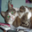
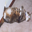
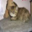
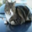
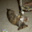

In [21]:
get_images_from_id(knn_model.query(image_test[0:1])).explore()

In [28]:
knn_model2=tc.nearest_neighbors.create(image_train[image_train['label']=='dog'],
                                       features=['deep_features']
                                     ,label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 15.556ms     |

| Done         |         | 100         | 78.649ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

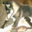
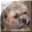
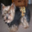
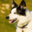
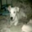

In [30]:
res=get_images_from_id(knn_model2.query(image_test[0:1]))
res['image'].explore()

In [31]:
knn_model.summary()

Class                          : NearestNeighborsModel

Attributes
----------
Method                         : brute_force
Number of distance components  : 1
Number of examples             : 2005
Number of feature columns      : 1
Number of unpacked features    : 4096
Distance                       : euclidean
Total training time (seconds)  : 0.8519

